In [20]:
import statistics

data = open("processing-results.txt", "r")

grok_time = []
producer_time = []
schema_time = []

for i in data:
    if "Grok time" in i:
        d = i.split(":")[1].strip("\n").strip("\t")
        grok_time.append(float(d))
    elif "Schema time" in i:
        d = i.split(":")[1].strip("\n").strip("\t")
        schema_time.append(float(d))
    elif "Producer time" in i:
        d = i.split(":")[1].strip("\n").strip("\t")
        producer_time.append(float(d))
    else:
        pass

print(f"Number of messages measured: {len(grok_time)}")
print(f"Avg Grok: {'%.2e' % statistics.mean(grok_time)}")
print(f"Avg Schema: {'%.2e' % statistics.mean(schema_time)}")
print(f"Avg Producer: {'%.2e' % statistics.mean(producer_time)}")
print(float(statistics.mean(producer_time)))

Number of messages measured: 54989
Avg Grok: 1.97e-03
Avg Schema: 3.57e-05
Avg Producer: 2.45e-05
2.4527366063922123e-05


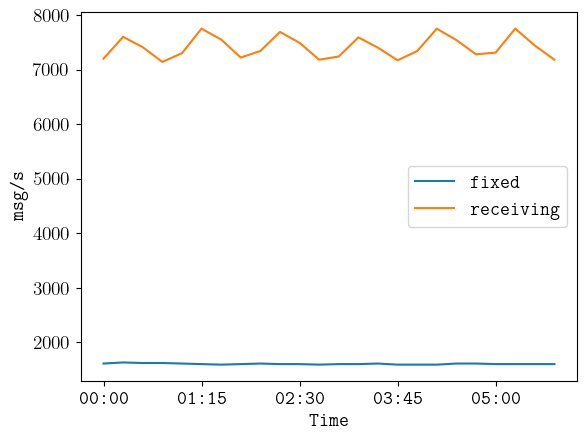

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("msg_per_sec.csv", index_col="Time")

df["fixed"] = df["fixed"].apply(lambda x: x*1000)
df["receiving"]=df["receiving"].apply(lambda x: x*1000)

plt.rcParams.update(
    {"text.usetex": True, "font.family": "monospace", "font.size": "14"}
)
plt.ylabel('msg/s')
df['fixed'].plot(label='fixed')
df['receiving'].plot(label='receiving')
plt.legend()
plt.show()